In [5]:
# basic IV test routine for single point single dot

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
import dot_classifier
reload(dot_classifier)
import thomas_fermi
reload(thomas_fermi)
import markov_graph
reload(markov_graph)
import pdb

N_v_points = 200
V_d_vec = np.linspace(-5e-3,0e-3,N_v_points)
I_vec = np.zeros(N_v_points)

x = np.arange(4)
K = thomas_fermi.create_K_matrix(x,E_scale=1e-3)

battery_ind = []
max_prob_node = []

for i in range(N_v_points):
    V = np.array([0e-3,V_d_vec[i],V_d_vec[i],0e-3])
    mu_l = (10e-3,10e-3+0.1e-3)
    
    graph_model = (5,1)
    battery_weight = 1000
    kT = 20e-6
    physics = (x,V,K,mu_l,battery_weight,kT)

   
    if(i==0):
        G = markov_graph.generate_graph(graph_model, physics)
        battery_ind = markov_graph.get_battery_nodes(G)
    else:
        G = markov_graph.recalculate_weights(G,physics)  
        
    I_vec[i] = markov_graph.get_current(G,battery_ind)
    max_prob_node += [markov_graph.get_max_prob_node(G)]


/Users/ssk4/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:35: ComplexWarning: Casting complex values to real discards the imaginary part


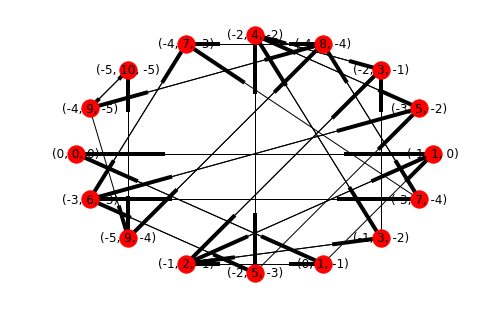

In [19]:
nx.draw_shell(G,with_labels=True)

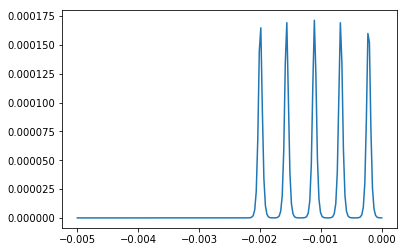

In [27]:
plt.plot(V_d_vec,I_vec)

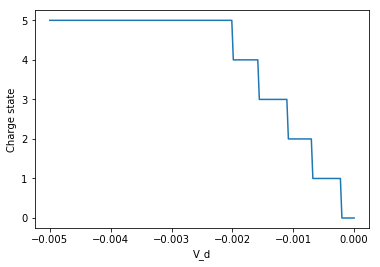

In [28]:
max_prob_node = np.array(max_prob_node)
plt.plot(V_d_vec,max_prob_node[:,1])
plt.xlabel('V_d')
plt.ylabel('Charge state')